# **CSC413 Final Project**

Group member: **Bonan LIN, Quanru REN**

# **Introduction**


We will use **LSTM model** to analyze the previous stock prices, updating the trainable weights during each
learning processes, utilizes LSTM cells to capture the weight of dependencies, and use our pre-trained models to
predict the close price of next day.


*   **Input:** opening price and closing price of **previous one week (7 days)**
*   **Output:** next day's closing price

Input and output are both float.

# **Model Figure**

Our LSTM model consists of serveral functions: the hidden state update function $f_W$ and the output function $g_U$. 


Input gate: $i_t = \sigma(W_{i}x_t  + U_{i}h_{t-1} + b_{i})$


Output gate: $o_t = \sigma(W_{r}x_t  + W_{r}h_{t-1} + b_{r})$


Hidden state: $h_t = o_t*\tanh(c_t)$


Forget gate: $r_t = \sigma(W_{r}x_t  + U_{r}h_{t-1} + b_{r})$


Cell gate: ${c_t} = \tanh(W_{ic}x_t + b_{ic} + W_{hc}h_{t-1} + b_{hc})$


Update cell state: $c_t = f_tc_{t-1} + i_t{c_t}$





# **Model Parameters**

We have **2 input parameters** from downloaded dataset:

*   opening price
*   closing price

And **Hyperparameters**:

*   Hidden size
*   Number of layers
*   Learning rate
*   Optimizer
*   Batch size
*   Sequence length

Hidden size, number of layers effects our **model building**,

Learning rate, optimizer, batch size effects the **training processes**,

Sequence length (7 days) will decide the effects of **dependencies weight of day-streak**, we will make it **7** (one week) in our project.

All of the hyperparameters would effects the performance of models.


# **Data Source**

We have our data from website:

https://finance.yahoo.com/quote/TSLA/history/


# **Data Summary**

The dataset is about the stock price from Mar 20, 2013 to Mar 20, 2023. 

This dataset could avoiding under-fitting since the dataset is sufficient, no empty data at all make sure that the quantity of data is enough and contains the stock prices of previous 10 years. We do not have to clean the data since
the data type is not string, no empty data and dollar sign.

The data is a CSV file and the variables we intend to use are all numerical values, we will import the data and select the column of opening price and closing
price as the input data, and we will have the next day's closing data as our target.




# **Data Transformation**

We have the 10 years of tesla stock price as our dataset.

After downloading the csv data, we implement *read_csv* function to extract the data,

We implement normalization to transform the input data distribution to a standard distribution， which could reducing the problems of vanishing or exploding gradients during training, also making the model more generalizable.

Then we transform our raw data into $x$ and $y$

where $x$ has shape of (7, 2), 7 represents previous 7 days' data, 2 stands for
opening price and closing price of that day.

and $y$ has shape of (1), which represents the next day's closing price.

Since the length of training data is 1510, we have total 1503 number of $x$ and
1503 $y$ corresponding to $x$.


# **Data Split**

We have 2517 rows of data, we will take

70% data as training data (1510) ,

10% data as validation data(216), for tuning hyperparameters and preventing overfitting.

20% data as testing data (504) for ensuring the model has the ability to generalize.




# **Hyperparamter Tuning**

We will tune hyperparameters like following:

*   Number of layers：2 (to improve the model's expressive power)
*   Hidden size：64 (common value that can effectively balance model performance and training time)
*   Optimizer：Adam (performs well on many problems)

The rest hyperparameters were chosen based on the dataset and our project.

*   Learning rate：0.001
*   Batch size：25
*   Sequence length：7


# **Quantitative Measures**

For measuring the performance of models,

We chose to use MSEloss as our metric because it not only tells us the magnitude of the prediction error, but also reflects the direction of the error.
Also, MSEloss is not sensitive to the outlier datas which fit our model better.

We did not use Cross-entropy since Cross-entropy is for evaluating classification problems, while stock prediction is a regression problem that requires predicting a continuous variable.

# **Quantitative and Qualitative Results**

Based on the training curve, the top half of the data fits our prediction before Tesla became famous. However, the stock will have a big change in a short time with the impression of news, government and so on. In the latter part, because of such changes, the prediction result is not very ideal.

# **Justification of Results**

Stock prices are time series data, and the trend of rise and fall and the change of trend have obvious time correlation. LSTM model can capture long-term dependence and complex relationships in time series data.

Besides, Predicting stock prices requires taking historical data, while LSTM models can capture historical information through memory units and gating mechanisms and make predictions based on historical information.

# **Ethical Consideration**

If our LSTM models could predict market trends and provide valuable information to investors, then our model can reduce risks of investors. 

However, if this technology is used for fraudulent purposes, it can negatively effect the market.

For **stock traders** and **investment advisors**, using LSTM model requires legal standards to ensure the profits of client.

For **relevant government employees**, they need to develop regulations and laws to supervise the use of LSTM technology to prevent it from being misused.

For **Limitation of our model**
Our model predict very well based on the historical dataset. However, our model could not capture the factors of the news, politics of the government and other data not based on the historical open and close price. The large bias significantly effect our prediction


# **Authors**

We have 2 members in group, and we shared the equal workload, including the steps of finding
dataset, data exploring, construct architecture of model mathematical formulas, analyzing the
feasibility, implementing in code, analyzing the training, evaluating the model, debugging,
encouraging each other, enjoying the completion of project, etc.

# **Code**

**Import**

In [2]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.models, torchvision.datasets

import pandas as pd

%matplotlib inline

**Data**


In [3]:
from google.colab import drive
drive.mount('/content/gdrive')



Mounted at /content/gdrive


In [4]:
df = pd.read_csv("/content/gdrive/MyDrive/CSC413/finalproject/tesla.csv",usecols=['Open','Close'])



train = df[0:1762]
valid = df[1762:2013]
test = df[2013:]





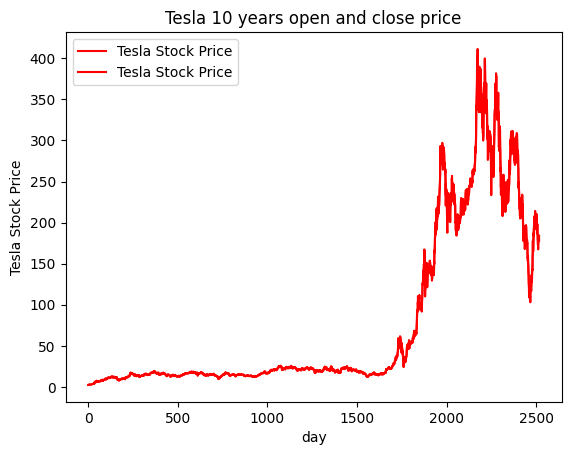

In [5]:
based_on_days = 7

new = np.array(train.iloc[:,:])
newv = np.array(valid.iloc[:,:])
newt = np.array(test.iloc[:,:])
x = []
y = []
a = []
b = []
c = []
d = []
len(df)
for i in range(len(new) - based_on_days):
    x.append(new[i:i+based_on_days])
    y.append(new[i+based_on_days][1])

for i in range(len(newv) - based_on_days):
    a.append(new[i:i+based_on_days])
    b.append(new[i+based_on_days][1])

for i in range(len(newt) - based_on_days):
    c.append(new[i:i+based_on_days])
    d.append(new[i+based_on_days][1])

plt.plot(df, color = 'red', label = 'Tesla Stock Price')

plt.title('Tesla 10 years open and close price')
plt.xlabel('day')
plt.ylabel('Tesla Stock Price')
plt.legend()
plt.show()

Model

In [74]:
class LSTM(nn.Module):
    def __init__(self, input, hidden, layers):
        super(LSTM, self).__init__()
        self.input_size = input
        self.hs = hidden
        self.nl = layers
        self.lstm = nn.LSTM(input, hidden, layers, batch_first=True)
        self.fc = nn.Linear(hidden, 1)
        self.double()
        #make our input datatype be double

    def forward(self, x):
        x = x.double()
        h = torch.zeros(self.nl, x.size(0), self.hs, dtype=x.dtype)
        c = torch.zeros(self.nl, x.size(0), self.hs, dtype=x.dtype)
        out= self.lstm(x, (h, c))[0]
        out = self.fc(out[:, -1, :])
        return out



Training Function

In [75]:


def train(model, batch_size, learning_rate, num_epochs, train_data, train_target, val_data, val_target):
    td = torch.tensor(train_data, dtype=torch.double)
    tt =  torch.tensor(train_target, dtype=torch.double)

    traindata = torch.utils.data.TensorDataset(td, tt)
    
    vd = torch.tensor(val_data, dtype=torch.double)
    vt = torch.tensor(val_target, dtype=torch.double)


    valdata = torch.utils.data.TensorDataset(vd, vt)

    val_loader = torch.utils.data.DataLoader(valdata, batch_size=batch_size, shuffle=True)

    train_loader = torch.utils.data.DataLoader(traindata, batch_size=batch_size, shuffle=True)

    optimizer = optim.Adam(model.parameters(), learning_rate)

    criterion = nn.MSELoss()


    train_losses = []
    val_losses = []

    for epoch in range(num_epochs):
        train_loss = 0
        val_loss = 0
        model.train()
        model.double()
       
        for batch, (data, label) in enumerate(train_loader):
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, label)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()

        train_loss = train_loss / len(train_loader)
        train_losses.append(train_loss)

        model.eval() 


        with torch.no_grad():
            for batch, (data, label) in enumerate(val_loader):
                outputs = model(data)
                loss = criterion(outputs, label)
                val_loss += loss.item()

        val_loss = val_loss / len(val_loader)
        val_losses.append(val_loss)

        print('Trainloss: {}, validloss: {}'.format(train_loss, val_loss))
    

    plt.plot(train_losses, label='Training Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()





Training

Trainloss: 307.6365891742765, validloss: 63.87273142911967
Trainloss: 228.92158227560353, validloss: 31.956390584902888
Trainloss: 177.05478272660727, validloss: 20.09332836662839
Trainloss: 147.20554654242082, validloss: 14.460857304496272
Trainloss: 125.99783312719373, validloss: 11.978603482839112
Trainloss: 110.42353955864733, validloss: 11.305809625119693
Trainloss: 96.31275119888402, validloss: 12.299317697299776
Trainloss: 85.51324588475201, validloss: 14.132296316975424
Trainloss: 76.63765446291923, validloss: 17.008765367093996
Trainloss: 70.4418032563857, validloss: 20.387785861360577
Trainloss: 63.80349944437274, validloss: 23.937527942888117
Trainloss: 60.49526909511143, validloss: 28.08173763085392
Trainloss: 55.65727834214, validloss: 32.18774299788956
Trainloss: 52.935425861602845, validloss: 36.44013059022312
Trainloss: 50.74524452348339, validloss: 40.296515594740875
Trainloss: 48.68180059800289, validloss: 44.418459628971405
Trainloss: 47.97145240881175, validloss: 47

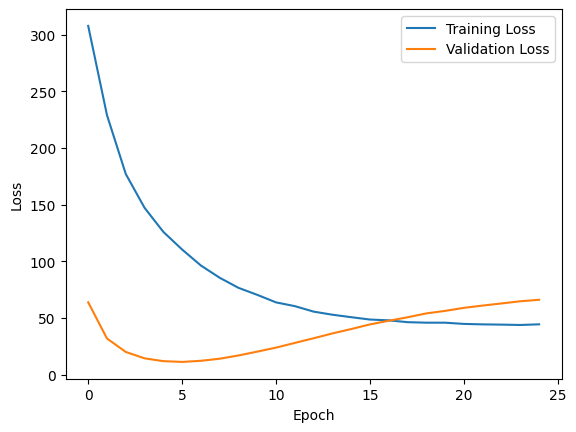

In [81]:

batch_size = 128
learning_rate = 0.001
num_epochs = 25
train_data = x
train_target = y
val_data = a
val_target = b
model = LSTM(2, 64, 2)

train(model, batch_size, learning_rate, num_epochs, train_data, train_target, val_data, val_target)


Test Accuracy

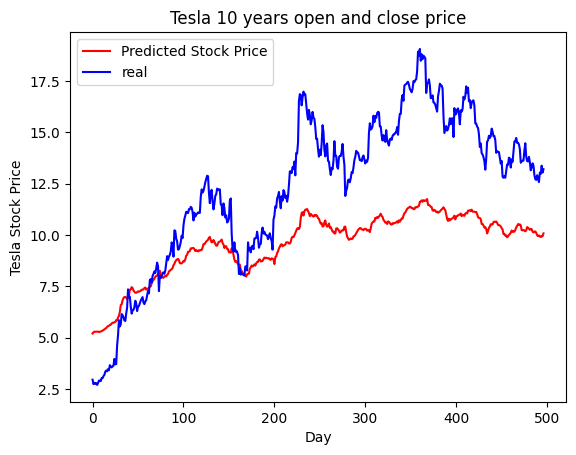

In [222]:
model = LSTM(2, 64, 2)



model.eval()
with torch.no_grad():
    predicted_output = model(torch.tensor(c, dtype=torch.double))


predicted_closing_price = predicted_output.numpy().flatten()



plt.plot(predicted_closing_price*100, color='red', label='Predicted Stock Price')
plt.plot(d, color='blue', label='real')


plt.title('Tesla 10 years open and close price')
plt.xlabel('Day')
plt.ylabel('Tesla Stock Price')
plt.legend()

plt.show()

